## Project 



## Load Datasets


In [1]:
import tensorflow as tf
import numpy as np
import math
import timeit
import matplotlib.pyplot as plt
from PIL import Image
import glob
import os
from scipy import misc
import random
%matplotlib inline
print(os.getcwd())
os.chdir("/home/shiv")
print(os.getcwd())


/home/shiv
/home/shiv


In [2]:
# Reading data and cropping into images
# NKI data
cwd = os.getcwd()
ctr = 0
num_crops = 15
num_NKI_images = 107
kernel_size = 256
stride2 = 218
stride1 = 232
NKI_crops_x = np.zeros((num_NKI_images, num_crops, kernel_size, kernel_size, 3))
NKI_crops_y = np.zeros((num_NKI_images, num_crops, kernel_size, kernel_size, 3))
os.chdir("/home/shiv/3002564s3/NKI_Training")
root = cwd + "/3002564s3/NKI_Training/labeled"

for file in glob.glob("0.*"):
  img = Image.open(file)
  labfile = os.path.join(root, file[2:])
  labimg = Image.open(labfile)
  crop_no = 0
  for i in range(0, np.shape(img)[0] - kernel_size + 1, stride1):
    for j in range(0, np.shape(img)[1] - kernel_size + 1, stride2):
      img2 = img.crop((j,i,j+kernel_size,i+kernel_size))
      labimg2 = labimg.crop((j,i,j+kernel_size,i+kernel_size))
      NKI_crops_x[ctr, crop_no, :, :, :] = img2
      NKI_crops_y[ctr, crop_no, :, :, :] = labimg2
      crop_no += 1

  ctr += 1

# VGH Data
ctr = 0
num_VGH_images = 51
VGH_crops_x = np.zeros((num_VGH_images, num_crops, kernel_size, kernel_size, 3))
VGH_crops_y = np.zeros((num_VGH_images, num_crops, kernel_size, kernel_size, 3))
os.chdir(cwd+"/3002564s3/VGH_Training")
root = cwd+"/3002564s3/VGH_Training/labeled"
t = 0
for file in glob.glob("0.*"):
  img = Image.open(file)
  labfile = os.path.join(root, file[2:])
  labimg = Image.open(labfile)
  crop_no = 0
  for i in range(0, np.shape(img)[0] - kernel_size + 1, stride1):
    for j in range(0, np.shape(img)[1] - kernel_size + 1, stride2):
      img2 = img.crop((j,i,j+kernel_size,i+kernel_size))
      labimg2 = labimg.crop((j,i,j+kernel_size,i+kernel_size))
      VGH_crops_x[ctr, crop_no, :, :, :] = img2
      VGH_crops_y[ctr, crop_no, :, :, :] = labimg2
      crop_no += 1
  ctr += 1

os.chdir(cwd)

In [3]:
NKI_labels = np.zeros((num_NKI_images,num_crops,kernel_size,kernel_size))
VGH_labels = np.zeros((num_VGH_images,num_crops,kernel_size,kernel_size))

#Labeling scheme:
#0 tumor cells, 1 non-tumor cells, 2 other

for f in range(0,num_NKI_images):
  for c in range(0,num_crops):
    isnotblack =  np.logical_or((NKI_crops_y[f,c,:,:,0] > 50), (NKI_crops_y[f,c,:,:,1] > 50))
    isblack = np.logical_not(isnotblack)
    isred = isnotblack * (NKI_crops_y[f,c,:,:,0] > NKI_crops_y[f,c,:,:,1])
    isgreen = isnotblack * (NKI_crops_y[f,c,:,:,0] < NKI_crops_y[f,c,:,:,1])
    NKI_labels[f,c,:,:] =  0*isred + 1*isgreen + 2*isblack

NKI_labels = NKI_labels.transpose(2,3,0,1).reshape((kernel_size,kernel_size,num_NKI_images*num_crops)).transpose(2,0,1)

for f in range(0,num_VGH_images):
  for c in range(0,num_crops):
    isnotblack =  np.logical_or((VGH_crops_y[f,c,:,:,0] > 50), (VGH_crops_y[f,c,:,:,1] > 50))
    isblack = np.logical_not(isnotblack)
    isred = isnotblack * (VGH_crops_y[f,c,:,:,0] > VGH_crops_y[f,c,:,:,1])
    isgreen = isnotblack * (VGH_crops_y[f,c,:,:,0] < VGH_crops_y[f,c,:,:,1])
    VGH_labels[f,c,:,:] =  0*isred + 1*isgreen + 2*isblack

VGH_labels = VGH_labels.transpose(2,3,0,1).reshape((kernel_size,kernel_size,num_VGH_images*num_crops)).transpose(2,0,1)
nimg, ncrops, sx, sy, sc = NKI_crops_x.shape
NKI_x = NKI_crops_x.transpose(2, 3, 4, 0, 1).reshape((sx, sy, sc, nimg * ncrops)).transpose(3,0,1,2)
NKI_y = NKI_crops_y.transpose(2, 3, 4, 0, 1).reshape((sx, sy, sc, nimg * ncrops)).transpose(3,0,1,2)

vimg, vcrops, sx, sy, sc = VGH_crops_x.shape
VGH_x = VGH_crops_x.transpose(2, 3, 4, 0, 1).reshape((sx, sy, sc, vimg * vcrops)).transpose(3,0,1,2)
VGH_y = VGH_crops_y.transpose(2, 3, 4, 0, 1).reshape((sx, sy, sc, vimg * vcrops)).transpose(3,0,1,2)

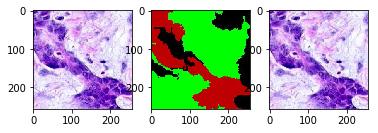

In [4]:
plt.subplot(1,3,1)
plt.imshow(VGH_x[338,:,:,:].astype('uint8'))
plt.subplot(1,3,2)
plt.imshow(VGH_y[338,:,:,:].astype('uint8'))
plt.subplot(1,3,3)
plt.imshow(VGH_crops_x[22,8,:,:,:].astype('uint8'))
plt.show()
# print(NKI_labels[10,:20,:20])

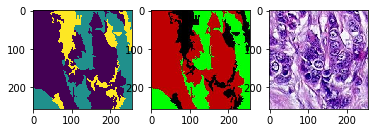

In [5]:
plt.subplot(1,3,1)
plt.imshow(NKI_labels[200,:,:].astype('uint8'))
plt.subplot(1,3,2)
plt.imshow(NKI_y[200,:,:,:].astype('uint8'))
plt.subplot(1,3,3)
plt.imshow(NKI_x[200,:,:,:].astype('uint8'))
plt.show()
# print(NKI_labels[10,:20,:20])

In [6]:
random.seed(231)

# Combining NKI and VGH
X = NKI_x
X = np.append(X, VGH_x, axis=0)
y = NKI_labels
y = np.append(y, VGH_labels, axis=0)

print("X shape: " + str(np.shape(X)))
print("y shape: " + str(np.shape(y)))

indices = np.arange(2370)
np.random.shuffle(indices)
num_train, num_val, num_test = 1659, 237, 474
train_indices = indices[:num_train]
val_indices = indices[num_train:num_train+num_val]
test_indices = indices[num_train+num_val:]

X_train = X[train_indices,:,:,:]
y_train = y[train_indices,:,:]

X_val = X[val_indices,:,:,:]
y_val = y[val_indices,:,:]

X_test = X[test_indices,:,:,:]
y_test = y[test_indices,:,:]

# Printing dimensions
print("X_train shape : " + str(np.shape(X_train)))
print("y_train shape : " + str(np.shape(y_train)))

print("X_val shape : " + str(np.shape(X_val)))
print("y_val shape : " + str(np.shape(y_val)))

print("X_test shape : " + str(np.shape(X_test)))
print("y_test shape : " + str(np.shape(y_test)))


# plt.imshow(X_test[0,:,:,:].astype('uint8'))
# plt.show()

X shape: (2370, 256, 256, 3)
y shape: (2370, 256, 256)
X_train shape : (1659, 256, 256, 3)
y_train shape : (1659, 256, 256)
X_val shape : (237, 256, 256, 3)
y_val shape : (237, 256, 256)
X_test shape : (474, 256, 256, 3)
y_test shape : (474, 256, 256)


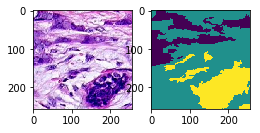

133

In [7]:
plt.subplot(1,3,1)
plt.imshow(X_test[11,:,:,:].astype('uint8'))
plt.subplot(1,3,2)
plt.imshow(y_test[11,:,:].astype('uint8'))
# plt.subplot(1,3,3)
# plt.imshow(NKI_x[200,:,:,:].astype('uint8'))
plt.show()
test_indices[11]

In [8]:
def run_model(session, predict, loss_val, Xd, yd,
              epochs=1, batch_size=64, print_every=100,
              training=None, plot_losses=False):
    # have tensorflow compute accuracy
    correct_prediction = tf.equal(tf.argmax(predict,3), tf.cast(y,tf.int64))
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

    
    # shuffle indicies
    train_indicies = np.arange(Xd.shape[0])
    np.random.shuffle(train_indicies)

    training_now = training is not None
    
    # setting up variables we want to compute (and optimizing)
    # if we have a training function, add that to things we compute
    variables = [loss_val,correct_prediction,accuracy]
    if training_now:
        variables[-1] = training
    
    # counter 
    iter_cnt = 0
    for e in range(epochs):
        # keep track of losses and accuracy
        correct = 0
        losses = []
        # make sure we iterate over the dataset once
        for i in range(int(math.ceil(Xd.shape[0]/batch_size))):
            # generate indicies for the batch
            start_idx = (i*batch_size)%Xd.shape[0]
            idx = train_indicies[start_idx:start_idx+batch_size]
            
            # create a feed dictionary for this batch
            feed_dict = {X: Xd[idx,:,:,:],
                         y: yd[idx,:,:],
                         is_training: training_now }
            # get batch size
            actual_batch_size = yd[idx].shape[0]
            dim1 = yd[idx].shape[1]
            dim2 = yd[idx].shape[2]
            
            # have tensorflow compute loss and correct predictions
            # and (if given) perform a training step
            loss, corr, _ = session.run(variables,feed_dict=feed_dict)
            
            # aggregate performance stats
            losses.append(loss*actual_batch_size)
            correct += np.sum(corr)
            
            # print every now and then
            if training_now and (iter_cnt % print_every) == 0:
                print("Iteration {0}: with minibatch training loss = {1:.3g} and accuracy of {2:.2g}"\
                      .format(iter_cnt,loss,np.sum(corr)/actual_batch_size/dim1/dim2))
            iter_cnt += 1
        total_correct = correct/Xd.shape[0]/dim1/dim2
        total_loss = np.sum(losses)/Xd.shape[0]
        print("Epoch {2}, Overall loss = {0:.3g} and accuracy of {1:.3g}"\
              .format(total_loss,total_correct,e+1))
        if plot_losses:
            plt.plot(losses)
            plt.grid(True)
            plt.title('Epoch {} Loss'.format(e+1))
            plt.xlabel('minibatch number')
            plt.ylabel('minibatch loss')
            plt.show()
    return total_loss,total_correct
sess = tf.Session()
#with tf.Session() as sess:
#with tf.device("/cpu:0"): #"/cpu:0" or "/gpu:0" 
#    sess.run(tf.global_variables_initializer())
#    print('Training')
#    run_model(sess,y_out,mean_loss,X_train,y_train,30,64,100,train_step,True)
    #print('Validation')
    #run_model(sess,y_out,mean_loss,X_val,y_val,1,64)

In [9]:
# clear old variables
tf.reset_default_graph()
X = tf.placeholder(tf.float32, [None, 256, 256, 3])
y = tf.placeholder(tf.int32, [None, 256, 256])
is_training = tf.placeholder(tf.bool)

# define model
def semantic_segmentation(X,y,is_training):
    conv1 = tf.layers.conv2d(inputs=X, filters=32, kernel_size=[11, 11], padding="same", activation=tf.nn.relu)
    bn1 = tf.contrib.layers.batch_norm(conv1,center=True,scale=True,is_training=is_training)
    pool1 = tf.layers.max_pooling2d(inputs=bn1, pool_size=[2, 2], strides=2)
    print(pool1.get_shape())
    
    conv2 = tf.layers.conv2d(inputs=pool1, filters=64, kernel_size=[5, 5], padding="same", activation=tf.nn.relu)
    bn2 = tf.contrib.layers.batch_norm(conv2,center=True,scale=True,is_training=is_training)
    pool2 = tf.layers.max_pooling2d(inputs=bn2, pool_size=[2, 2], strides=2)
    print(pool2.get_shape())
    
    conv3 = tf.layers.conv2d(inputs=pool2, filters=128, kernel_size=[3, 3], padding="same", activation=tf.nn.relu)
    bn3 = tf.contrib.layers.batch_norm(conv3,center=True,scale=True,is_training=is_training)
    pool3 = tf.layers.max_pooling2d(inputs=bn3, pool_size=[2, 2], strides=2)
    print(pool3.get_shape())
    
    conv4 = tf.layers.conv2d(inputs=pool3, filters=256, kernel_size=[3, 3], padding="same", activation=tf.nn.relu)
    bn4 = tf.contrib.layers.batch_norm(conv4,center=True,scale=True,is_training=is_training)
    pool4 = tf.layers.max_pooling2d(inputs=bn4, pool_size=[2, 2], strides=2)
    print(pool4.get_shape())
    
    deconv = tf.layers.conv2d_transpose(pool4,128,[3,3],2,activation = tf.nn.relu,padding='same')
    print(deconv.get_shape())
    
    deconv2 = tf.layers.conv2d_transpose(deconv,64,[3,3],2,activation = tf.nn.relu,padding='same')
    print(deconv2.get_shape())
    
    deconv3 = tf.layers.conv2d_transpose(deconv2,32,[5,5],2,activation = tf.nn.relu,padding='same')
    print(deconv3.get_shape())
    
    y_out = tf.layers.conv2d_transpose(deconv3,3,[11,11],2,activation = tf.nn.relu,padding='same')
    print(y_out.get_shape())
       
    return y_out

y_out = semantic_segmentation(X,y,is_training)

(?, 128, 128, 32)
(?, 64, 64, 64)
(?, 32, 32, 128)
(?, 16, 16, 256)
(?, 32, 32, 128)
(?, 64, 64, 64)
(?, 128, 128, 32)
(?, 256, 256, 3)


To make sure you're doing the right thing, use the following tool to check the dimensionality of your output (it should be 64 x 10, since our batches have size 64 and the output of the final affine layer should be 10, corresponding to our 10 classes):

In [10]:
# Now we're going to feed a random batch into the model 
# and make sure the output is the right size
x = np.random.randn(1, 256, 256,3)
with tf.Session() as sess:
    with tf.device("/cpu:0"): #"/cpu:0" or "/gpu:0"
        tf.global_variables_initializer().run()

        ans = sess.run(y_out,feed_dict={X:x,is_training:True})
        %timeit sess.run(y_out,feed_dict={X:x,is_training:True})
        print(ans.shape)

100 loops, best of 3: 11.1 ms per loop
(1, 256, 256, 3)


You should see the following from the run above 

`(64, 10)`

`True`

### GPU!

Now, we're going to try and start the model under the GPU device, the rest of the code stays unchanged and all our variables and operations will be computed using accelerated code paths. However, if there is no GPU, we get a Python exception and have to rebuild our graph. On a dual-core CPU, you might see around 50-80ms/batch running the above, while the Google Cloud GPUs (run below) should be around 2-5ms/batch.

In [11]:
try:
    with tf.Session() as sess:
        with tf.device("/gpu:0") as dev: #"/cpu:0" or "/gpu:0"
            tf.global_variables_initializer().run()

            ans = sess.run(y_out,feed_dict={X:x,is_training:True})
            %timeit sess.run(y_out,feed_dict={X:x,is_training:True})
except tf.errors.InvalidArgumentError:
    print("no gpu found, please use Google Cloud if you want GPU acceleration")    
    # rebuild the graph
    # trying to start a GPU throws an exception 
    # and also trashes the original graph
    tf.reset_default_graph()
    X = tf.placeholder(tf.float32, [None, 256, 256, 3])
    y = tf.placeholder(tf.int32, [None,256,256,3])
    is_training = tf.placeholder(tf.bool)
    y_out = semantic_segmentation(X,y,is_training)

100 loops, best of 3: 11.2 ms per loop


You should observe that even a simple forward pass like this is significantly faster on the GPU. So for the rest of the assignment (and when you go train your models in assignment 3 and your project!), you should use GPU devices. However, with TensorFlow, the default device is a GPU if one is available, and a CPU otherwise, so we can skip the device specification from now on.

### Train the model.

Now that you've seen how to define a model and do a single forward pass of some data through it, let's  walk through how you'd actually train one whole epoch over your training data (using the complex_model you created provided above).

Make sure you understand how each TensorFlow function used below corresponds to what you implemented in your custom neural network implementation.

First, set up an **RMSprop optimizer** (using a 1e-3 learning rate) and a **cross-entropy loss** function. See the TensorFlow documentation for more information
* Layers, Activations, Loss functions : https://www.tensorflow.org/api_guides/python/nn
* Optimizers: https://www.tensorflow.org/api_guides/python/train#Optimizers

In [12]:
# Inputs
#     y_out: is what your model computes
#     y: is your TensorFlow variable with label information
# Outputs
#    mean_loss: a TensorFlow variable (scalar) with numerical loss
#    optimizer: a TensorFlow optimizer
# This should be ~3 lines of code!
#print(y_train.get_shape())
#sum_loss = 0
#for i in range(0,y_train.shape[0]):
#    sum_loss += tf.reduce_mean(tf.squared_difference(tf.cast(y_train[i,:,:,:],tf.float64),tf.cast(y_out[i,:,:,:],tf.float64)))
ysize = y.get_shape().as_list()
logits_reshaped = tf.reshape(y_out,[-1,3])
labels_reshaped = tf.one_hot(tf.reshape(y,[-1]),3)
loss = tf.nn.softmax_cross_entropy_with_logits(labels = tf.cast(labels_reshaped,tf.float32), logits = logits_reshaped)
meanloss = tf.reduce_mean(loss)# optimizer = tf.train.RMSPropOptimizer(learning_rate = 1e-4)
optimizer = tf.train.AdamOptimizer(1e-4)

In [13]:
# batch normalization in tensorflow requires this extra dependency
extra_update_ops = tf.get_collection(tf.GraphKeys.UPDATE_OPS)
with tf.control_dependencies(extra_update_ops):
    train_step = optimizer.minimize(meanloss)

### Train the model
Below we'll create a session and train the model over one epoch. You should see a loss of 1.4 to 1.8 and an accuracy of 0.4 to 0.5. There will be some variation due to random seeds and differences in initialization

In [14]:
sess = tf.Session()

sess.run(tf.global_variables_initializer())
print('Training')
run_model(sess,y_out,meanloss,X_train,y_train,15,32,20,train_step)
#run_model(session, predict, loss_val, Xd, yd,epochs=1, batch_size=64, print_every=100, training=None, plot_losses=False):

Training
Iteration 0: with minibatch training loss = 1.1 and accuracy of 0.36
Iteration 20: with minibatch training loss = 1.02 and accuracy of 0.51
Iteration 40: with minibatch training loss = 0.843 and accuracy of 0.62
Epoch 1, Overall loss = 0.972 and accuracy of 0.512
Iteration 60: with minibatch training loss = 0.889 and accuracy of 0.57
Iteration 80: with minibatch training loss = 0.754 and accuracy of 0.67
Iteration 100: with minibatch training loss = 0.731 and accuracy of 0.69
Epoch 2, Overall loss = 0.829 and accuracy of 0.609
Iteration 120: with minibatch training loss = 0.856 and accuracy of 0.6
Iteration 140: with minibatch training loss = 0.906 and accuracy of 0.61
Epoch 3, Overall loss = 0.812 and accuracy of 0.639
Iteration 160: with minibatch training loss = 0.778 and accuracy of 0.69
Iteration 180: with minibatch training loss = 0.759 and accuracy of 0.69
Iteration 200: with minibatch training loss = 0.852 and accuracy of 0.64
Epoch 4, Overall loss = 0.792 and accuracy

(0.61829834213596002, 0.75041293465566605)

### Check the accuracy of the model.

Let's see the train and test code in action -- feel free to use these methods when evaluating the models you develop below. You should see a loss of 1.3 to 1.5 with an accuracy of 0.45 to 0.55.

In [15]:
print('Validation')
run_model(sess,y_out,meanloss,X_val,y_val,1,32)

Validation
Epoch 1, Overall loss = 1.01 and accuracy of 0.509


(1.0063929215765202, 0.50855696151025187)

In [16]:
print('Test')
run_model(sess,y_out,meanloss,X_test,y_test,1,32)
type(y_out)

Test
Epoch 1, Overall loss = 1.03 and accuracy of 0.488


tensorflow.python.framework.ops.Tensor

### Test Set - Do this only once
Now that we've gotten a result that we're happy with, we test our final model on the test set. This would be the score we would achieve on a competition. Think about how this compares to your validation set accuracy.

In [17]:
#print('Test')
label = np.zeros((num_test,kernel_size,kernel_size,3))

for ind in np.arange(0,num_test,6):
    inds = np.arange(ind,ind+6)
    run_model(sess,y_out,meanloss,X_test[inds,:,:,:],y_test[inds,:,:],1,1)
    y_label = tf.nn.softmax(y_out)
    feed_dict = {X: X_test[inds,:,:,:], y: y_test[inds,:,:], is_training: None}
    label[inds,:,:,:] = sess.run(y_label,feed_dict=feed_dict)


#print('hello')
actual_label = np.argmax(label, axis=3) 
pic0 = np.zeros((1,1,3)) #red
pic1 = np.zeros((1,1,3)) #green
pic2 = np.zeros((1,1,3)) #black
pic0[:,:,0] = 255
pic1[:,:,1] = 255
test_outputs = np.zeros((num_test, kernel_size, kernel_size, 3))
ctr = 0



#Labeling scheme:
#0 tumor cells, 1 non-tumor cells, 2 other

for i in range(test_outputs.shape[0]):
    for r in range(256):
        for c in range(256):
            if actual_label[i,r,c] == 0:
                test_outputs[i,r,c,:] = pic0
            elif actual_label[i,r,c] == 1:
                test_outputs[i,r,c,:] = pic1
            elif actual_label[i,r,c] == 2:
                test_outputs[i,r,c,:] = pic2
   

Epoch 1, Overall loss = 1.11 and accuracy of 0.465
Epoch 1, Overall loss = 1.08 and accuracy of 0.429
Epoch 1, Overall loss = 0.984 and accuracy of 0.526
Epoch 1, Overall loss = 0.977 and accuracy of 0.55
Epoch 1, Overall loss = 1.16 and accuracy of 0.417
Epoch 1, Overall loss = 1.06 and accuracy of 0.463
Epoch 1, Overall loss = 0.854 and accuracy of 0.586
Epoch 1, Overall loss = 0.922 and accuracy of 0.592
Epoch 1, Overall loss = 1.01 and accuracy of 0.521
Epoch 1, Overall loss = 1.12 and accuracy of 0.432
Epoch 1, Overall loss = 0.934 and accuracy of 0.48
Epoch 1, Overall loss = 0.911 and accuracy of 0.555
Epoch 1, Overall loss = 1.23 and accuracy of 0.326
Epoch 1, Overall loss = 1.21 and accuracy of 0.279
Epoch 1, Overall loss = 0.887 and accuracy of 0.612
Epoch 1, Overall loss = 1.02 and accuracy of 0.525
Epoch 1, Overall loss = 1.03 and accuracy of 0.502
Epoch 1, Overall loss = 0.949 and accuracy of 0.593
Epoch 1, Overall loss = 0.95 and accuracy of 0.589
Epoch 1, Overall loss = 1

In [18]:
real_outputs = np.zeros((num_test, kernel_size, kernel_size, 3))

for i in range(test_outputs.shape[0]):
    for r in range(256):
        for c in range(256):
            if y_test[i,r,c] == 0:
                real_outputs[i,r,c,:] = pic0
            elif y_test[i,r,c] == 1:
                real_outputs[i,r,c,:] = pic1
            elif y_test[i,r,c] == 2:
                 real_outputs[i,r,c,:] = pic2

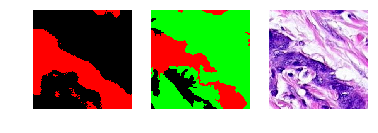

0.264739990234
<class 'numpy.float64'>
<class 'numpy.int64'>


In [36]:
plt.subplot(1,3,1)
crop = 100

plt.imshow(test_outputs[crop,:,:,:].astype('uint8'))
plt.gca().axis('off')
plt.subplot(1,3,2)
plt.imshow(real_outputs[crop,:,:,:].astype('uint8'))
plt.gca().axis('off')
plt.subplot(1,3,3)
plt.imshow(X_test[crop,:,:,:].astype('uint8'))
plt.gca().axis('off')
plt.show()
acc = np.sum(np.equal(actual_label[crop,:,:],y_test[crop,:,:]))/256/256
print(acc)

print(type(y_test[0,0,0]))
print(type(actual_label[0,0,0]))


Normalized confusion matrix
[[ 0.697  0.     0.303]
 [ 0.092  0.     0.908]
 [ 0.175  0.     0.825]]


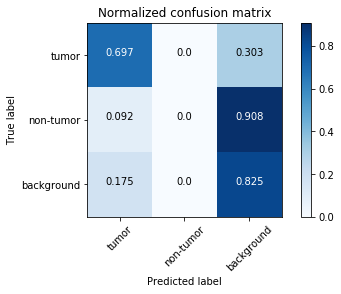

In [20]:
import itertools
from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        cm = np.round(cm,3)
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
    print(cm)
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
   
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

 
 
# Compute confusion matrix

cnf_matrix = confusion_matrix(np.ndarray.flatten(y_test), np.ndarray.flatten(actual_label))
np.set_printoptions(precision=5)
class_names = ['tumor','non-tumor','background']

# Plot Confusion Matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')
plt.show()

In [21]:
# # Saliency Maps
# run_model(sess,y_out,meanloss,X_train,y_train,1,64)
# def compute_saliency_maps(pass_X, pass_y):
#     correct_scores = tf.gather_nd(y_out, tf.stack((tf.range(pass_X.shape[0]), y), axis=3))
#     loss = tf.reduce_sum(correct_scores)
#     grad = tf.gradients(loss, X)[0]
#     abs_grad = tf.abs(grad)
#     max_grad = tf.reduce_max(abs_grad, axis=3)
#     saliency = sess.run(max_grad, feed_dict={X:pass_X, y:pass_y})
    
#     return saliency

 
# # Compute saliency Maps
# saliency = compute_saliency_maps(X_train, y_train)
# print(saliency.shape)

 
# # # Reconstruct the saliency maps corresponding to whole images
# # NUM_SALIENCY = int(saliency.shape[0] / NUM_CROPS)
# # saliency_recons = np.zeros((NUM_SALIENCY, int(CROP_SIZE * CROPS[0]), int(CROP_SIZE * CROPS[1])))
# # input_img = np.zeros((NUM_SALIENCY,int(CROP_SIZE * CROPS[0]), int(CROP_SIZE * CROPS[1]), 3))
# # label_img = np.zeros((NUM_SALIENCY,int(CROP_SIZE * CROPS[0]), int(CROP_SIZE * CROPS[1]), 3))
# # ctr = 0
# # for i in range(NUM_SALIENCY):
# #     j = 0
# #     while j < saliency_recons.shape[1]:
# #         k = 0
# #         while k < saliency_recons.shape[2]:
# #             saliency_recons[i, j:j+CROP_SIZE, k:k+CROP_SIZE] = saliency[ctr,:,:]
# #             input_img[i, j:j+CROP_SIZE, k:k+CROP_SIZE, :] = img_X[ctr,:,:,:]
# #             label_img[i, j:j+CROP_SIZE, k:k+CROP_SIZE, :] = img_y[ctr,:,:,:]
# #             ctr += 1
# #             k += CROP_SIZE
# #         j += CROP_SIZE

 
 
# # Display original, label and saliency map images
# plt.subplot(1,3,1)
# plt.imshow(X_train[100,:,:,:].astype('uint8'))
# plt.axis('off')
# plt.subplot(1,3,3)
# plt.imshow(saliency[100,:,:], cmap=plt.cm.hot)
# plt.axis('off')
# plt.subplot(1,3,2)
# plt.imshow(y_train[100,:,:,:].astype('uint8'))
# plt.axis('off')
# plt.show()